In [978]:
import torch
print(torch.__version__)

1.0.0


In [979]:
import torchvision
print(torchvision.__version__)

0.2.1


In [980]:
if torch.cuda.is_available():
    devID=torch.cuda.current_device()
    devID, torch.cuda.get_device_name(devID)
else:
    print("Torch Cuda not avaialbe")

Torch Cuda not avaialbe


In [981]:
PATH ='data/'
!ls data

models	tmdb_5000_credits.csv  tmdb_5000_movies.csv  tmp


In [982]:
import pandas as pd 
import numpy as np 
import json

#movies = pd.read_csv(PATH+'tmdb_5000_movies.csv')
#credits = pd.read_csv(PATH+'tmdb_5000_credits.csv')

In [983]:
def load_tmdb_movies(path):
    df = pd.read_csv(path)
    df['release_date'] = pd.to_datetime(df['release_date']).apply(lambda x: x.date())
    json_columns = ['genres', 'keywords', 'production_countries', 'production_companies', 'spoken_languages']
    for column in json_columns:
        df[column] = df[column].apply(json.loads)  #needed to make json objects lists rahter than strings
    return df

def load_tmdb_credits(path):
    df = pd.read_csv(path)
    json_columns = ['cast', 'crew']
    for column in json_columns:
        df[column] = df[column].apply(json.loads)
    return df

In [984]:
movies = load_tmdb_movies(PATH+'tmdb_5000_movies.csv')
credits = load_tmdb_credits(PATH+'tmdb_5000_credits.csv')

In [985]:
movies.head().T

,0,1,2,3,4
budget,237000000,300000000,245000000,250000000,260000000
genres,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...","[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...","[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...","[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...","[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam..."
homepage,http://www.avatarmovie.com/,http://disney.go.com/disneypictures/pirates/,http://www.sonypictures.com/movies/spectre/,http://www.thedarkknightrises.com/,http://movies.disney.com/john-carter
id,19995,285,206647,49026,49529
keywords,"[{'id': 1463, 'name': 'culture clash'}, {'id':...","[{'id': 270, 'name': 'ocean'}, {'id': 726, 'na...","[{'id': 470, 'name': 'spy'}, {'id': 818, 'name...","[{'id': 849, 'name': 'dc comics'}, {'id': 853,...","[{'id': 818, 'name': 'based on novel'}, {'id':..."
original_language,en,en,en,en,en
original_title,Avatar,Pirates of the Caribbean: At World's End,Spectre,The Dark Knight Rises,John Carter
overview,"In the 22nd century, a paraplegic Marine is di...","Captain Barbossa, long believed to be dead, ha...",A cryptic message from Bond’s past sends him o...,Following the death of District Attorney Harve...,"John Carter is a war-weary, former military ca..."
popularity,150.438,139.083,107.377,112.313,43.927
production_companies,"[{'name': 'Ingenious Film Partners', 'id': 289...","[{'name': 'Walt Disney Pictures', 'id': 2}, {'...","[{'name': 'Columbia Pictures', 'id': 5}, {'nam...","[{'name': 'Legendary Pictures', 'id': 923}, {'...","[{'name': 'Walt Disney Pictures', 'id': 2}]"


In [986]:
credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{'cast_id': 242, 'character': 'Jake Sully', '...","[{'credit_id': '52fe48009251416c750aca23', 'de..."
1,285,Pirates of the Caribbean: At World's End,"[{'cast_id': 4, 'character': 'Captain Jack Spa...","[{'credit_id': '52fe4232c3a36847f800b579', 'de..."
2,206647,Spectre,"[{'cast_id': 1, 'character': 'James Bond', 'cr...","[{'credit_id': '54805967c3a36829b5002c41', 'de..."
3,49026,The Dark Knight Rises,"[{'cast_id': 2, 'character': 'Bruce Wayne / Ba...","[{'credit_id': '52fe4781c3a36847f81398c3', 'de..."
4,49529,John Carter,"[{'cast_id': 5, 'character': 'John Carter', 'c...","[{'credit_id': '52fe479ac3a36847f813eaa3', 'de..."


In [987]:
credits.columns = ['id','title2','cast','crew']
credits.head()

,id,title2,cast,crew
0,19995,Avatar,"[{'cast_id': 242, 'character': 'Jake Sully', '...","[{'credit_id': '52fe48009251416c750aca23', 'de..."
1,285,Pirates of the Caribbean: At World's End,"[{'cast_id': 4, 'character': 'Captain Jack Spa...","[{'credit_id': '52fe4232c3a36847f800b579', 'de..."
2,206647,Spectre,"[{'cast_id': 1, 'character': 'James Bond', 'cr...","[{'credit_id': '54805967c3a36829b5002c41', 'de..."
3,49026,The Dark Knight Rises,"[{'cast_id': 2, 'character': 'Bruce Wayne / Ba...","[{'credit_id': '52fe4781c3a36847f81398c3', 'de..."
4,49529,John Carter,"[{'cast_id': 5, 'character': 'John Carter', 'c...","[{'credit_id': '52fe479ac3a36847f813eaa3', 'de..."


In [988]:
df = movies.merge(credits,how='inner',on='id')
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,title2,cast,crew
0,237000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.avatarmovie.com/,19995,"[{'id': 1463, 'name': 'culture clash'}, {'id':...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{'name': 'Ingenious Film Partners', 'id': 289...",...,162.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{'cast_id': 242, 'character': 'Jake Sully', '...","[{'credit_id': '52fe48009251416c750aca23', 'de..."
1,300000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",http://disney.go.com/disneypictures/pirates/,285,"[{'id': 270, 'name': 'ocean'}, {'id': 726, 'na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{'name': 'Walt Disney Pictures', 'id': 2}, {'...",...,169.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{'cast_id': 4, 'character': 'Captain Jack Spa...","[{'credit_id': '52fe4232c3a36847f800b579', 'de..."
2,245000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{'id': 470, 'name': 'spy'}, {'id': 818, 'name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{'name': 'Columbia Pictures', 'id': 5}, {'nam...",...,148.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{'cast_id': 1, 'character': 'James Bond', 'cr...","[{'credit_id': '54805967c3a36829b5002c41', 'de..."
3,250000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",http://www.thedarkknightrises.com/,49026,"[{'id': 849, 'name': 'dc comics'}, {'id': 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{'name': 'Legendary Pictures', 'id': 923}, {'...",...,165.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[{'cast_id': 2, 'character': 'Bruce Wayne / Ba...","[{'credit_id': '52fe4781c3a36847f81398c3', 'de..."
4,260000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://movies.disney.com/john-carter,49529,"[{'id': 818, 'name': 'based on novel'}, {'id':...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{'name': 'Walt Disney Pictures', 'id': 2}]",...,132.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[{'cast_id': 5, 'character': 'John Carter', 'c...","[{'credit_id': '52fe479ac3a36847f813eaa3', 'de..."


In [989]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4802
Data columns (total 23 columns):
budget                  4803 non-null int64
genres                  4803 non-null object
homepage                1712 non-null object
id                      4803 non-null int64
keywords                4803 non-null object
original_language       4803 non-null object
original_title          4803 non-null object
overview                4800 non-null object
popularity              4803 non-null float64
production_companies    4803 non-null object
production_countries    4803 non-null object
release_date            4802 non-null object
revenue                 4803 non-null int64
runtime                 4801 non-null float64
spoken_languages        4803 non-null object
status                  4803 non-null object
tagline                 3959 non-null object
title                   4803 non-null object
vote_average            4803 non-null float64
vote_count              4803 non-null 

In [990]:
df.shape

(4803, 23)

In [991]:
df.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


In [992]:
def splitJsonToList(obj, column):
    fullDict = []
    for i in obj[column]:
    #    dictLine = json.loads(i)
        localDict = []
        for items in i:
            localDict.append(items['name'])
    #    print(localDict)
        fullDict.append(localDict)
    return fullDict

In [993]:
# this would run if we didn't load csv files with json.load 
# fullDict = []
# for i in movies['genres']:
#     dictLine = json.loads(i)
#     localDict = []
#     for items in dictLine:
#         localDict.append(items['name'])
#     print(localDict)
#     fullDict.append(localDict)

In [994]:
df['genres'][0]

[{'id': 28, 'name': 'Action'},
 {'id': 12, 'name': 'Adventure'},
 {'id': 14, 'name': 'Fantasy'},
 {'id': 878, 'name': 'Science Fiction'}]

In [995]:
df['keywords'][0]

[{'id': 1463, 'name': 'culture clash'},
 {'id': 2964, 'name': 'future'},
 {'id': 3386, 'name': 'space war'},
 {'id': 3388, 'name': 'space colony'},
 {'id': 3679, 'name': 'society'},
 {'id': 3801, 'name': 'space travel'},
 {'id': 9685, 'name': 'futuristic'},
 {'id': 9840, 'name': 'romance'},
 {'id': 9882, 'name': 'space'},
 {'id': 9951, 'name': 'alien'},
 {'id': 10148, 'name': 'tribe'},
 {'id': 10158, 'name': 'alien planet'},
 {'id': 10987, 'name': 'cgi'},
 {'id': 11399, 'name': 'marine'},
 {'id': 13065, 'name': 'soldier'},
 {'id': 14643, 'name': 'battle'},
 {'id': 14720, 'name': 'love affair'},
 {'id': 165431, 'name': 'anti war'},
 {'id': 193554, 'name': 'power relations'},
 {'id': 206690, 'name': 'mind and soul'},
 {'id': 209714, 'name': '3d'}]

In [996]:
df['production_companies'][0]

[{'name': 'Ingenious Film Partners', 'id': 289},
 {'name': 'Twentieth Century Fox Film Corporation', 'id': 306},
 {'name': 'Dune Entertainment', 'id': 444},
 {'name': 'Lightstorm Entertainment', 'id': 574}]

In [997]:
df['production_countries'][0]

[{'iso_3166_1': 'US', 'name': 'United States of America'},
 {'iso_3166_1': 'GB', 'name': 'United Kingdom'}]

In [998]:
df['spoken_languages'][0]

[{'iso_639_1': 'en', 'name': 'English'},
 {'iso_639_1': 'es', 'name': 'Español'}]

In [999]:
df['cast'][0]

[{'cast_id': 242,
  'character': 'Jake Sully',
  'credit_id': '5602a8a7c3a3685532001c9a',
  'gender': 2,
  'id': 65731,
  'name': 'Sam Worthington',
  'order': 0},
 {'cast_id': 3,
  'character': 'Neytiri',
  'credit_id': '52fe48009251416c750ac9cb',
  'gender': 1,
  'id': 8691,
  'name': 'Zoe Saldana',
  'order': 1},
 {'cast_id': 25,
  'character': 'Dr. Grace Augustine',
  'credit_id': '52fe48009251416c750aca39',
  'gender': 1,
  'id': 10205,
  'name': 'Sigourney Weaver',
  'order': 2},
 {'cast_id': 4,
  'character': 'Col. Quaritch',
  'credit_id': '52fe48009251416c750ac9cf',
  'gender': 2,
  'id': 32747,
  'name': 'Stephen Lang',
  'order': 3},
 {'cast_id': 5,
  'character': 'Trudy Chacon',
  'credit_id': '52fe48009251416c750ac9d3',
  'gender': 1,
  'id': 17647,
  'name': 'Michelle Rodriguez',
  'order': 4},
 {'cast_id': 8,
  'character': 'Selfridge',
  'credit_id': '52fe48009251416c750ac9e1',
  'gender': 2,
  'id': 1771,
  'name': 'Giovanni Ribisi',
  'order': 5},
 {'cast_id': 7,
  'c

In [1000]:
df['crew'][0]

[{'credit_id': '52fe48009251416c750aca23',
  'department': 'Editing',
  'gender': 0,
  'id': 1721,
  'job': 'Editor',
  'name': 'Stephen E. Rivkin'},
 {'credit_id': '539c47ecc3a36810e3001f87',
  'department': 'Art',
  'gender': 2,
  'id': 496,
  'job': 'Production Design',
  'name': 'Rick Carter'},
 {'credit_id': '54491c89c3a3680fb4001cf7',
  'department': 'Sound',
  'gender': 0,
  'id': 900,
  'job': 'Sound Designer',
  'name': 'Christopher Boyes'},
 {'credit_id': '54491cb70e0a267480001bd0',
  'department': 'Sound',
  'gender': 0,
  'id': 900,
  'job': 'Supervising Sound Editor',
  'name': 'Christopher Boyes'},
 {'credit_id': '539c4a4cc3a36810c9002101',
  'department': 'Production',
  'gender': 1,
  'id': 1262,
  'job': 'Casting',
  'name': 'Mali Finn'},
 {'credit_id': '5544ee3b925141499f0008fc',
  'department': 'Sound',
  'gender': 2,
  'id': 1729,
  'job': 'Original Music Composer',
  'name': 'James Horner'},
 {'credit_id': '52fe48009251416c750ac9c3',
  'department': 'Directing',
  

In [1001]:
df2 = df.copy()

In [1002]:
features = ['genres', 'cast', 'crew', 'keywords','production_companies', 'production_countries', 'spoken_languages']
for column in features:
    df2[column] = splitJsonToList(df2, column)

In [1003]:
#movies2['genres'] = splitJsonToList(movies2, 'genres')
#['id', 'budget', 'original_title', 'popularity', 'vote_average', 'vote_count']

In [1004]:
df2.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,title2,cast,crew
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",http://www.avatarmovie.com/,19995,"[culture clash, future, space war, space colon...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[Ingenious Film Partners, Twentieth Century Fo...",...,162.0,"[English, Español]",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weave...","[Stephen E. Rivkin, Rick Carter, Christopher B..."
1,300000000,"[Adventure, Fantasy, Action]",http://disney.go.com/disneypictures/pirates/,285,"[ocean, drug abuse, exotic island, east india ...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[Walt Disney Pictures, Jerry Bruckheimer Films...",...,169.0,[English],Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[Johnny Depp, Orlando Bloom, Keira Knightley, ...","[Dariusz Wolski, Gore Verbinski, Jerry Bruckhe..."
2,245000000,"[Action, Adventure, Crime]",http://www.sonypictures.com/movies/spectre/,206647,"[spy, based on novel, secret agent, sequel, mi...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[Columbia Pictures, Danjaq, B24]",...,148.0,"[Français, English, Español, Italiano, Deutsch]",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[Daniel Craig, Christoph Waltz, Léa Seydoux, R...","[Thomas Newman, Sam Mendes, Anna Pinnock, John..."
3,250000000,"[Action, Crime, Drama, Thriller]",http://www.thedarkknightrises.com/,49026,"[dc comics, crime fighter, terrorist, secret i...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[Legendary Pictures, Warner Bros., DC Entertai...",...,165.0,[English],Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[Christian Bale, Michael Caine, Gary Oldman, A...","[Hans Zimmer, Charles Roven, Christopher Nolan..."
4,260000000,"[Action, Adventure, Science Fiction]",http://movies.disney.com/john-carter,49529,"[based on novel, mars, medallion, space travel...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,[Walt Disney Pictures],...,132.0,[English],Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[Taylor Kitsch, Lynn Collins, Samantha Morton,...","[Andrew Stanton, Andrew Stanton, John Lasseter..."


In [1005]:
n_movies=int(df2.id.nunique())
n_movies

4803

In [1006]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4802
Data columns (total 23 columns):
budget                  4803 non-null int64
genres                  4803 non-null object
homepage                1712 non-null object
id                      4803 non-null int64
keywords                4803 non-null object
original_language       4803 non-null object
original_title          4803 non-null object
overview                4800 non-null object
popularity              4803 non-null float64
production_companies    4803 non-null object
production_countries    4803 non-null object
release_date            4802 non-null object
revenue                 4803 non-null int64
runtime                 4801 non-null float64
spoken_languages        4803 non-null object
status                  4803 non-null object
tagline                 3959 non-null object
title                   4803 non-null object
vote_average            4803 non-null float64
vote_count              4803 non-null 

In [1007]:
#from sklearn.model_selection import train_test_split
#train, test = train_test_split(df2, test_size=0.2)
# print(train.shape,test.shape)

In [1058]:
# select only few relative columns
df_small = df[['id', 'budget', 'popularity', 'vote_average', 'vote_count']].copy()

In [1059]:
df_small.head()

,id,budget,popularity,vote_average,vote_count
0,19995,237000000,150.437577,7.2,11800
1,285,300000000,139.082615,6.9,4500
2,206647,245000000,107.376788,6.3,4466
3,49026,250000000,112.312950,7.6,9106
4,49529,260000000,43.926995,6.1,2124


In [1060]:
# check cardinality of some variables
df_small['vote_count'].value_counts()

0       62
1       53
2       46
4       43
3       41
6       38
8       37
10      34
11      32
9       32
7       31
5       28
15      26
19      26
12      26
13      25
16      24
22      23
34      23
31      22
24      22
18      22
17      21
25      20
26      20
23      19
27      19
66      19
29      19
47      18
        ..
382      1
2435     1
2439     1
402      1
2395     1
4500     1
4524     1
2491     1
2495     1
8662     1
474      1
2399     1
4432     1
2143     1
2251     1
8428     1
1221     1
2199     1
162      1
170      1
2247     1
2263     1
4412     1
2271     1
230      1
2295     1
266      1
2359     1
314      1
2039     1
Name: vote_count, Length: 1609, dtype: int64

In [1061]:
# we don't have to dead with nan filling, since all values valid
df_small.isnull().values.any()

False

In [1062]:
#df_small.T
df_small.head()

,id,budget,popularity,vote_average,vote_count
0,19995,237000000,150.437577,7.2,11800
1,285,300000000,139.082615,6.9,4500
2,206647,245000000,107.376788,6.3,4466
3,49026,250000000,112.312950,7.6,9106
4,49529,260000000,43.926995,6.1,2124


In [1063]:
# check cardinality of some variables
#df_small['budget'].value_counts()

We need to instantiate an object of the TabularData class we created earlier. But before that, we need to label encode the categorical features. For this, we will be using sklearn.preprocessing.LabelEncoder. 

In [1064]:
#categorical_features = ["id", "vote_average", "vote_count", "budget"]
categorical_features = ['id']
output_feature = 'popularity'

In [1065]:

min_rating,max_rating = df_small.popularity.min(),df_small.popularity.max()
min_rating,max_rating

(0.0, 875.581305)

In [1066]:
df_small.popularity= (df_small.popularity-min_rating)/(max_rating-min_rating)

In [1084]:
df_small.head()

,id,budget,popularity,vote_average,vote_count
0,19995,237000000,0.171815,7.2,11800
1,285,300000000,0.158846,6.9,4500
2,206647,245000000,0.122635,6.3,4466
3,49026,250000000,0.128272,7.6,9106
4,49529,260000000,0.050169,6.1,2124


In [1068]:
df_small.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4802
Data columns (total 5 columns):
id              4803 non-null int64
budget          4803 non-null int64
popularity      4803 non-null float64
vote_average    4803 non-null float64
vote_count      4803 non-null int64
dtypes: float64(2), int64(3)
memory usage: 225.1 KB


In [1069]:
import sklearn
print(sklearn.__version__)

0.20.1


In [1024]:
df_small.shape

(4803, 5)

In [1070]:
# remove target feature column as separate
target_feature_column = df_small.popularity
df_small_train = df_small.drop([output_feature], axis=1)

In [1085]:
df_small_train.head()

,id,budget,vote_average,vote_count
0,19995,237000000,7.2,11800
1,285,300000000,6.9,4500
2,206647,245000000,6.3,4466
3,49026,250000000,7.6,9106
4,49529,260000000,6.1,2124


In [1122]:
import numpy as np
from sklearn.model_selection import train_test_split

#withoug target column in X train data
X,X_test,y,y_test = train_test_split( df_small_train, target_feature_column, test_size=0.25, random_state=42)

# with target column in X train data
#X, X_test, y, y_test = train_test_split( df_small, target_feature_column, test_size=0.25, random_state=42)

In [1124]:
X.head()

,id,budget,vote_average,vote_count
3816,2167,3768785,7.3,22
3690,2644,4600000,7.3,93
1647,1403,30000000,6.7,157
1196,329,40000000,8.0,4391
620,869,90000000,7.3,481


In [1125]:
y.head()

3816    0.001971
3690    0.007274
1647    0.010623
1196    0.085019
620     0.029870
Name: popularity, dtype: float64

In [1123]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for cat_col in categorical_features:
        label_encoders[cat_col] = LabelEncoder()
        X[cat_col] = label_encoders[cat_col].fit_transform(X[cat_col])
        X_test[cat_col] = label_encoders[cat_col].fit_transform(X_test[cat_col])

/home/norvilr/anaconda3/envs/torch10/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/norvilr/anaconda3/envs/torch10/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [1126]:
df_small.shape, X.shape, X_test.shape

((4803, 5), (3602, 4), (1201, 4))

In [1127]:
X.head()

,id,budget,vote_average,vote_count
3816,2167,3768785,7.3,22
3690,2644,4600000,7.3,93
1647,1403,30000000,6.7,157
1196,329,40000000,8.0,4391
620,869,90000000,7.3,481


In [1089]:
type(X), type(y)

(pandas.core.frame.DataFrame, pandas.core.series.Series)

In [1090]:
target_feature_column_df = pd.DataFrame(y).head()
target_feature_column_df

,popularity
3816,0.001971
3690,0.007274
1647,0.010623
1196,0.085019
620,0.029870


In [1092]:
#X[output_feature]=target_feature_column_df
X.head()

,id,budget,popularity,vote_average,vote_count
3816,2167,3768785,0.001971,7.3,22
3690,2644,4600000,0.007274,7.3,93
1647,1403,30000000,0.010623,6.7,157
1196,329,40000000,0.085019,8.0,4391
620,869,90000000,0.029870,7.3,481


In [1093]:
from torch.utils.data import Dataset, DataLoader


class TabularDataset(Dataset):
  def __init__(self, data, cat_cols=None, output_col=None):
    """
    Characterizes a Dataset for PyTorch

    Parameters
    ----------

    data: pandas data frame
      The data frame object for the input data. It must
      contain all the continuous, categorical and the
      output columns to be used.

    cat_cols: List of strings
      The names of the categorical columns in the data.
      These columns will be passed through the embedding
      layers in the model. These columns must be
      label encoded beforehand. 

    output_col: string
      The name of the output variable column in the data
      provided.
    """

    self.n = data.shape[0]

    if output_col:
      self.y = data[output_col].astype(np.float32).values.reshape(-1, 1)
    else:
      self.y =  np.zeros((self.n, 1))

    self.cat_cols = cat_cols if cat_cols else []
    self.cont_cols = [col for col in data.columns
                      if col not in self.cat_cols + [output_col]]

    if self.cont_cols:
      self.cont_X = data[self.cont_cols].astype(np.float32).values
    else:
      self.cont_X = np.zeros((self.n, 1))

    if self.cat_cols:
      self.cat_X = data[cat_cols].astype(np.int64).values
    else:
      self.cat_X =  np.zeros((self.n, 1))

  def __len__(self):
    """
    Denotes the total number of samples.
    """
    return self.n

  def __getitem__(self, idx):
    """
    Generates one sample of data.
    """
    return [self.y[idx], self.cont_X[idx], self.cat_X[idx]]

In [1134]:
from torch.utils.data import Dataset, DataLoader

class TabularDataset2(Dataset):
  def __init__(self, data, output_data,cat_cols=None):
    """
    Characterizes a Dataset for PyTorch

    Parameters
    ----------

    data: pandas data frame
      The data frame object for the input data. It must
      contain all the continuous, categorical and the
      output columns to be used.

    cat_cols: List of strings
      The names of the categorical columns in the data.
      These columns will be passed through the embedding
      layers in the model. These columns must be
      label encoded beforehand. 

    output_col: string
      The name of the output variable column in the data
      provided.
    """

    self.n = data.shape[0]

#     if output_col:
#       self.y = data[output_col].astype(np.float32).values.reshape(-1, 1)
#     else:
#       self.y =  np.zeros((self.n, 1))
    self.y = output_data.astype(np.float32).values.reshape(-1, 1)

    self.cat_cols = cat_cols if cat_cols else []
    self.cont_cols = [col for col in data.columns
                       if col not in self.cat_cols]

    if self.cont_cols:
      self.cont_X = data[self.cont_cols].astype(np.float32).values
    else:
      self.cont_X = np.zeros((self.n, 1))

    if self.cat_cols:
      self.cat_X = data[cat_cols].astype(np.int64).values
    else:
      self.cat_X =  np.zeros((self.n, 1))

  def __len__(self):
    """
    Denotes the total number of samples.
    """
    return self.n

  def __getitem__(self, idx):
    """
    Generates one sample of data.
    """
    return [self.y[idx], self.cont_X[idx], self.cat_X[idx]]

Let’s instantiate an object of the TabularDataset class. 

In [ ]:
# Pytorch abstract class representing a Dataset.
#All other datasets should subclass it. All subclasses should override
#``__len__``, that provides the size of the dataset, and ``__getitem__``,


#dataset = TabularDataset(data=X, cat_cols=categorical_features, output_col=output_feature)
#test_dataset = TabularDataset(data=X_test, cat_cols=categorical_features, output_col=output_feature)

In [1135]:
# option with TabularDataset2
dataset = TabularDataset2(data=X, output_data=y, cat_cols=categorical_features)
test_dataset = TabularDataset2(data=X_test, output_data=y_test, cat_cols=categorical_features)


In [1136]:
dataset.cat_cols,dataset.cat_X, dataset.cont_cols, dataset.cont_X, dataset.y, dataset.n

(['id'], array([[2167],
        [2644],
        [1403],
        [ 329],
        ...,
        [ 499],
        [2473],
        [ 776],
        [2485]]), ['budget',
  'vote_average',
  'vote_count'], array([[3.768785e+06, 7.300000e+00, 2.200000e+01],
        [4.600000e+06, 7.300000e+00, 9.300000e+01],
        [3.000000e+07, 6.700000e+00, 1.570000e+02],
        [4.000000e+07, 8.000000e+00, 4.391000e+03],
        ...,
        [8.000000e+07, 5.800000e+00, 6.310000e+02],
        [1.000000e+07, 6.100000e+00, 2.100000e+02],
        [4.000000e+06, 6.200000e+00, 8.000000e+01],
        [5.500000e+07, 6.900000e+00, 5.730000e+02]], dtype=float32), array([[0.001971],
        [0.007274],
        [0.010623],
        [0.085019],
        ...,
        [0.02967 ],
        [0.017108],
        [0.006958],
        [0.026112]], dtype=float32), 3602)

In [1137]:
dataset.y

array([[0.001971],
       [0.007274],
       [0.010623],
       [0.085019],
       ...,
       [0.02967 ],
       [0.017108],
       [0.006958],
       [0.026112]], dtype=float32)

In [1138]:
len(dataset.cont_cols)

3

In [1139]:
len(dataset.cat_cols)

1

In [1140]:
len(dataset), len(test_dataset)

(3602, 1201)

In order to run the training loop, we need to create a torch.util.data.Dataloader object. It serves the following purpose –
 -   creates batches from the dataset
 -   shuffles the data
 -   loads the data in parallel

In [1141]:
#??DataLoader
#    Data loader. Combines a dataset and a sampler, and provides
#    single- or multi-process iterators over the dataset.

In [1142]:
batchsize = 64
dataloader = DataLoader(dataset, batchsize, shuffle=True, num_workers=1)
test_dataloader = DataLoader(test_dataset, batchsize, shuffle=True, num_workers=1)

In [1143]:
dataloader.batch_size

64

In [1144]:
len(dataloader.dataset), len(test_dataloader.dataset)

(3602, 1201)

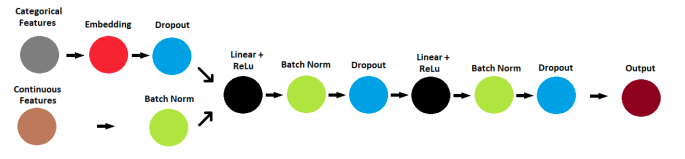

In [1145]:
import torch
import torch.nn as nn
import torch.nn.functional as F


class FeedForwardNN(nn.Module):

  def __init__(self, emb_dims, no_of_cont, lin_layer_sizes,
               output_size, emb_dropout, lin_layer_dropouts):

    """
    Parameters
    ----------

    emb_dims: List of two element tuples
      This list will contain a two element tuple for each
      categorical feature. The first element of a tuple will
      denote the number of unique values of the categorical
      feature. The second element will denote the embedding
      dimension to be used for that feature.

    no_of_cont: Integer
      The number of continuous features in the data.

    lin_layer_sizes: List of integers.
      The size of each linear layer. The length will be equal
      to the total number
      of linear layers in the network.

    output_size: Integer
      The size of the final output.

    emb_dropout: Float
      The dropout to be used after the embedding layers.

    lin_layer_dropouts: List of floats
      The dropouts to be used after each linear layer.
    """

    super().__init__()

    # Embedding layers
    self.emb_layers = nn.ModuleList([nn.Embedding(x, y)
                                     for x, y in emb_dims])

    no_of_embs = sum([y for x, y in emb_dims])
    self.no_of_embs = no_of_embs
    self.no_of_cont = no_of_cont

    # Linear Layers
    first_lin_layer = nn.Linear(self.no_of_embs + self.no_of_cont,
                                lin_layer_sizes[0])

    self.lin_layers =\
     nn.ModuleList([first_lin_layer] +\
          [nn.Linear(lin_layer_sizes[i], lin_layer_sizes[i + 1])
           for i in range(len(lin_layer_sizes) - 1)])
    
    for lin_layer in self.lin_layers:
      nn.init.kaiming_normal_(lin_layer.weight.data)

    # Output Layer
    self.output_layer = nn.Linear(lin_layer_sizes[-1],
                                  output_size)
    nn.init.kaiming_normal_(self.output_layer.weight.data)

    # Batch Norm Layers
    self.first_bn_layer = nn.BatchNorm1d(self.no_of_cont)
    self.bn_layers = nn.ModuleList([nn.BatchNorm1d(size)
                                    for size in lin_layer_sizes])

    # Dropout Layers
    self.emb_dropout_layer = nn.Dropout(emb_dropout)
    self.droput_layers = nn.ModuleList([nn.Dropout(size)
                                  for size in lin_layer_dropouts])

  def forward(self, cont_data, cat_data):

    if self.no_of_embs != 0:
      x = [emb_layer(cat_data[:, i])
           for i,emb_layer in enumerate(self.emb_layers)]
      x = torch.cat(x, 1)
      x = self.emb_dropout_layer(x)

    if self.no_of_cont != 0:
      normalized_cont_data = self.first_bn_layer(cont_data)

      if self.no_of_embs != 0:
        x = torch.cat([x, normalized_cont_data], 1) 
      else:
        x = normalized_cont_data

    for lin_layer, dropout_layer, bn_layer in\
        zip(self.lin_layers, self.droput_layers, self.bn_layers):
      
      x = F.relu(lin_layer(x))
      x = bn_layer(x)
      x = dropout_layer(x)

    x = self.output_layer(x)

    return x

In [1146]:
''' Example Neural Net for MovieLens dataset (Users, Movies)

lass EmbeddingNet(nn.Module):
    def __init__(self, n_users, n_movies, nh=10, p1=0.05, p2=0.5):
        super().__init__()
        (self.u, self.m) = [get_emb(*o) for o in [
            (n_users, n_factors), (n_movies, n_factors)]]
        self.lin1 = nn.Linear(n_factors*2, nh)
        self.lin2 = nn.Linear(nh, 1)
        self.drop1 = nn.Dropout(p1)
        self.drop2 = nn.Dropout(p2)
        
    def forward(self, cats, conts):
        users,movies = cats[:,0],cats[:,1]
        x = self.drop1(torch.cat([self.u(users),self.m(movies)], dim=1))
        x = self.drop2(F.relu(self.lin1(x)))
        return F.sigmoid(self.lin2(x)) * (max_rating-min_rating+1) + min_rating-0.5
'''

' Example Neural Net for MovieLens dataset (Users, Movies)\n\nlass EmbeddingNet(nn.Module):\n    def __init__(self, n_users, n_movies, nh=10, p1=0.05, p2=0.5):\n        super().__init__()\n        (self.u, self.m) = [get_emb(*o) for o in [\n            (n_users, n_factors), (n_movies, n_factors)]]\n        self.lin1 = nn.Linear(n_factors*2, nh)\n        self.lin2 = nn.Linear(nh, 1)\n        self.drop1 = nn.Dropout(p1)\n        self.drop2 = nn.Dropout(p2)\n        \n    def forward(self, cats, conts):\n        users,movies = cats[:,0],cats[:,1]\n        x = self.drop1(torch.cat([self.u(users),self.m(movies)], dim=1))\n        x = self.drop2(F.relu(self.lin1(x)))\n        return F.sigmoid(self.lin2(x)) * (max_rating-min_rating+1) + min_rating-0.5\n'

Now that we have created the basic data structure to run the training loop, we need to instantiate a model object of the FeedForwadNN class created earlier. This class requires a list of tuples, where each tuple represents a pair of total and the embedding dimension of a categorical variable

In [1147]:
cat_dims = [int(X[col].nunique()) for col in categorical_features]
cat_dims

[3602]

In [1148]:
cat_dimsT = [int(X_test[col].nunique()) for col in categorical_features]
cat_dimsT

[1201]

In [1149]:
emb_dims = [(x, min(50, (x + 1) // 2)) for x in cat_dims]
emb_dims

[(3602, 50)]

 The hidden layer dimension is 50 and 100 for the first and second layers respectively. The embedding dropout used is 0.04. The hidden layer dropouts are 0.001 and 0.01. 

In [1150]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
#device = torch.device('cpu')
device

device(type='cpu')

In [1151]:

model = FeedForwardNN(emb_dims, no_of_cont=len(dataset.cont_cols), 
                      lin_layer_sizes=[50, 100],
                      output_size=1, emb_dropout=0.04,
                      lin_layer_dropouts=[0.001,0.01])
model = model.to(device)

In [1152]:
model.train()

FeedForwardNN(
  (emb_layers): ModuleList(
    (0): Embedding(3602, 50)
  )
  (lin_layers): ModuleList(
    (0): Linear(in_features=53, out_features=50, bias=True)
    (1): Linear(in_features=50, out_features=100, bias=True)
  )
  (output_layer): Linear(in_features=100, out_features=1, bias=True)
  (first_bn_layer): BatchNorm1d(3, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn_layers): ModuleList(
    (0): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (1): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (emb_dropout_layer): Dropout(p=0.04)
  (droput_layers): ModuleList(
    (0): Dropout(p=0.001)
    (1): Dropout(p=0.01)
  )
)

In [1153]:
#model.eval()

 Run the training loop

In [1154]:
categorical_features

['id']

In [1155]:
no_of_epochs = 50
criterion = nn.MSELoss()
#criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [1156]:
# state = {'epoch': epoch + 1,
#          'state_dict': model.state_dict(),
#          'optim_dict' : optimizer.state_dict()}


In [1164]:
#from sklearn.metrics import accuracy_score

In [1158]:
import os
import time
import copy

since = time.time()

best_model_wts = copy.deepcopy(model.state_dict())
best_acc = 0.0
best_tst_loss = 1000.0
train_losses, test_losses = [],[]

for epoch in range(no_of_epochs):
    running_loss = 0.0
    running_train_corrects = 0.0
    
    # TRAINING PHASE
    i=0
    #print('Epoch {}/{}'.format(epoch, no_of_epochs - 1))
    model.train()  # Set model to training mode
    pid = os.getpid()
    for y, cont_x, cat_x in dataloader:
        i += 1
        cat_x = cat_x.to(device)
        cont_x = cont_x.to(device)
        y  = y.to(device)
        
        # zero the parameter gradients
        optimizer.zero_grad()

        # Forward Pass
        preds = model(cont_x, cat_x)
        loss = criterion(preds, y)
        
        # Backward Pass and Optimization
        loss.backward()
        optimizer.step()
        
        # statistics
        running_loss += loss.item() * cat_x.size(0)  #multiple by batch size
        running_train_corrects += torch.sum(preds == y.data).float()
        #print(running_loss)
        
        # print statistics
        #if i % 1000:    # print every n mini-batches         
         #   print('{}\tTrain Epoch: {} [{}/{} ({:.0f}%)] Loss: {:.4f}'.format(
        #        pid, epoch, i * len(cat_x), len(dataloader.dataset),
        #        100. * i / len(dataloader), loss.item()))
    
    # TESTING PHASE
    model.eval()   # Set model to evaluate mode
    running_corrects = 0
    test_loss = 0
    test_loss2 = 0
    correct = 0
    i = 0
    for y, cont_x, cat_x in test_dataloader:
        i += 1
        cat_x = cat_x.to(device)
        cont_x = cont_x.to(device)
        y  = y.to(device)
        
        # zero the parameter gradients
        optimizer.zero_grad()
        
        #with torch.set_grad_enabled(False):
        with torch.no_grad():
            preds = model(cont_x, cat_x)
            loss = criterion(preds, y)
            #print(preds[0],y[0])
        
        #test_loss2 += F.nll_loss(preds, y, reduction='sum').item() # sum up batch loss
        #test_loss2  = 0
        #prd = preds.max(1)[1] # get the index of the max log-probability
        #correct += prd.eq(y).sum().item()
        
        running_corrects += torch.sum(preds == y.data).float()
        #running_corrects+=accuracy_score(y, preds)*100
        test_loss += loss.item() * cat_x.size(0)   #cat_x.zize(0) - batch size of 64=       
    
    epoch_train_loss = running_loss / len(dataset)
    epoch_train_acc = running_train_corrects / len(dataset)
    
    epoch_acc = running_corrects.double() / len(test_dataset)
    epoch_test_loss = test_loss / len(test_dataset)
    
    #print("test_loss2", test_loss2/ len(test_dataloader.dataset))
    #print( 'Accuracy: {}/{}'.format(correct, len(test_dataloader.dataset)))
    
    #epoch_loss = running_loss / dataset_sizes[phase]
    #epoch_acc = running_corrects.double() / dataset_sizes[phase]
    
    # deep copy the model
    if epoch_test_loss < best_tst_loss:
        best_tst_loss = epoch_test_loss
        best_model_wts = copy.deepcopy(model.state_dict())
        # this idea didn't work
 #   else: #always start new epoch with lowest loss
 #       model.load_state_dict(best_model_wts)
    
    print('Epoch {}/{}, Train Loss: {:.6f}, Train Acc:{:.6f}, Test Loss: {:.6f} Acc: {:.6f}'.format(epoch, no_of_epochs - 1, epoch_train_loss, epoch_train_acc, epoch_test_loss, epoch_acc))
    
    train_losses.append(epoch_train_loss)
    test_losses.append(epoch_test_loss)
    
# load best model weights
model.load_state_dict(best_model_wts)
print("Best Test Loss: ", best_tst_loss)

Epoch 0/49, Train Loss: 0.041358, Train Acc:0.000000, Test Loss: 0.002899 Acc: 0.000000
Epoch 1/49, Train Loss: 0.002150, Train Acc:0.000000, Test Loss: 0.001540 Acc: 0.000000
Epoch 2/49, Train Loss: 0.001501, Train Acc:0.000000, Test Loss: 0.001382 Acc: 0.000000
Epoch 3/49, Train Loss: 0.001220, Train Acc:0.000000, Test Loss: 0.001039 Acc: 0.000000
Epoch 4/49, Train Loss: 0.001000, Train Acc:0.000000, Test Loss: 0.000982 Acc: 0.000000
Epoch 5/49, Train Loss: 0.000910, Train Acc:0.000000, Test Loss: 0.000840 Acc: 0.000000
Epoch 6/49, Train Loss: 0.000831, Train Acc:0.000000, Test Loss: 0.000822 Acc: 0.000000
Epoch 7/49, Train Loss: 0.000793, Train Acc:0.000000, Test Loss: 0.000978 Acc: 0.000000
Epoch 8/49, Train Loss: 0.000791, Train Acc:0.000000, Test Loss: 0.001005 Acc: 0.000000
Epoch 9/49, Train Loss: 0.000944, Train Acc:0.000000, Test Loss: 0.000786 Acc: 0.000000
Epoch 10/49, Train Loss: 0.000717, Train Acc:0.000000, Test Loss: 0.001069 Acc: 0.000000
Epoch 11/49, Train Loss: 0.0007

In [1159]:
#preds == y.data
type(preds), type(y), type(y.data)

(torch.Tensor, torch.Tensor, torch.Tensor)

In [1160]:
train_losses[:5]

[0.041358427467007707,
 0.002149737288276647,
 0.001500597257575104,
 0.001219809125817491,
 0.0010001330919820258]

In [1161]:

import matplotlib.pyplot as plt
%matplotlib inline

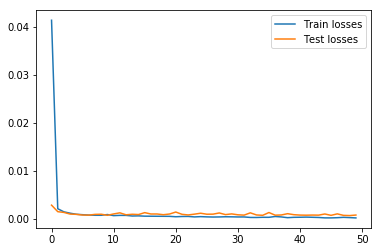

In [1162]:
plt.plot(train_losses,label = "Train losses")
plt.plot(test_losses, label = "Test losses")
plt.legend()

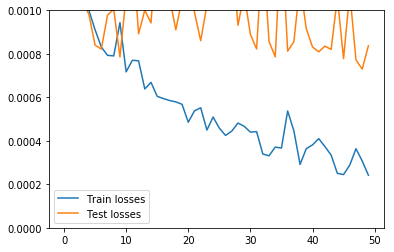

In [1163]:
plt.ylim(top=0.001)
plt.plot(train_losses,label = "Train losses")
plt.plot(test_losses, label = "Test losses")
plt.legend()

In [961]:
min_rating,max_rating = df_small.popularity.min(),df_small.popularity.max()
min_rating,max_rating

(0.0, 1.0)

In [962]:
mu=df_small.popularity.mean()
mu

0.024546321929719648

In [963]:
std=df_small.popularity.std()
std

0.036337744499396

In [964]:
a = df_small.popularity.copy()

In [965]:
type(a)

pandas.core.series.Series

In [966]:
from torchvision import transforms
t = torch.Tensor(a)
t=(t-mu)/std

In [967]:
t.mean()

tensor(1.7088e-08)

In [968]:
a.min(), a.max()

(0.0, 1.0)

In [969]:
b= (a-min_rating)/(max_rating-min_rating)

In [974]:
preds

tensor([[ 0.0197],
        [ 0.0146],
        [ 0.0251],
        [ 0.0128],
        [ 0.0069],
        [ 0.0434],
        [ 0.0146],
        [ 0.0409],
        [ 0.0138],
        [ 0.0240],
        [-0.0169],
        [ 0.0555],
        [ 0.0436],
        [ 0.0044],
        [ 0.0275],
        [ 0.0794],
        [ 0.0333],
        [ 0.0224],
        [ 0.0281],
        [ 0.0113],
        [ 0.0347],
        [-0.0190],
        [ 0.0459],
        [-0.0048],
        [ 0.0572],
        [ 0.0124],
        [ 0.0259],
        [ 0.0285],
        [ 0.0199],
        [ 0.0323],
        [ 0.0410],
        [ 0.0032],
        [ 0.0548],
        [ 0.0226],
        [ 0.0181],
        [ 0.0048],
        [ 0.0178],
        [ 0.0711],
        [ 0.0220],
        [ 0.0212],
        [ 0.0481],
        [ 0.0307],
        [ 0.0337],
        [ 0.0240],
        [ 0.0070],
        [-0.0043],
        [ 0.0214],
        [-0.0112],
        [ 0.0286]])

In [976]:
y.data

tensor([[5.0886e-03],
        [3.6591e-04],
        [2.0610e-02],
        [1.8814e-02],
        [1.7223e-02],
        [6.1393e-05],
        [2.2001e-02],
        [2.4218e-02],
        [1.9596e-02],
        [2.2360e-02],
        [1.5864e-06],
        [9.1088e-02],
        [4.0636e-02],
        [1.3392e-02],
        [3.6075e-02],
        [4.9571e-02],
        [3.2745e-02],
        [1.8694e-02],
        [9.7425e-02],
        [3.5481e-02],
        [1.0147e-02],
        [1.4867e-04],
        [2.0942e-02],
        [3.9982e-03],
        [4.7812e-02],
        [2.1243e-03],
        [2.2493e-02],
        [5.4965e-02],
        [3.3204e-02],
        [5.7798e-03],
        [4.7195e-02],
        [4.6749e-03],
        [2.0696e-02],
        [7.9588e-03],
        [1.5573e-02],
        [2.7950e-02],
        [4.8053e-03],
        [9.8341e-02],
        [4.7964e-02],
        [5.1288e-02],
        [6.1889e-03],
        [6.2747e-03],
        [1.6207e-02],
        [4.7251e-03],
        [3.5446e-02],
        [6

In [971]:
import fastai

In [972]:


%reload_ext autoreload
%autoreload 2
%matplotlib inline

#from fastai.learner import *
#from fastai.column_data import *
from fastai.basic_train import *


In [973]:
#fit(3, model, F.mse_loss, optimizer, dataset)
#fit(model, data, 3, optimizer, F.mse_loss)